In [6]:
from datetime import datetime,timedelta
from scipy.stats import iqr,skew,kurtosis,mode
from joblib import Parallel,delayed
import zipfile
import shutil
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.decomposition import PCA
from pprint import pprint
from sklearn.metrics import f1_score,r2_score,classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
import itertools
from sklearn.model_selection import ParameterGrid, cross_val_predict, GroupKFold,GridSearchCV,StratifiedKFold
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn import preprocessing
import tensorflow as tf
import numpy as np
seed = 100
tf.random.set_seed(seed)
np.random.seed(seed)
import os
import pandas as pd
import pickle
from tensorflow import keras
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split,LeavePGroupsOut
from tensorflow.keras.layers import Conv1D,BatchNormalization,Dropout,InputLayer,MaxPooling1D,Flatten,Dense,Input,Activation,GRU,Bidirectional,LSTM
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import accuracy_score
import tensorflow_addons as tfa
from collections import Counter
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import OPTICS,DBSCAN,KMeans
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

user_indices = ['3016','047dfad3-0807-37f0-bc90-7fd9dedb9bde','3002','1f879d60-3ccc-3b7a-b522-cbfbea277a9d',          '3003','0dd6b3c7-0314-3e6d-ac60-dde239068a6c','3100','7b6446b4-cfe0-3bf7-ae2f-c085363987db',          '3004','fd053cef-b5a5-3fe6-a158-b6702bce0665','3006','a8ca0b44-85fa-34f4-82d1-30612ac85961',          '3005','bc3e88a3-7bcf-3c61-9284-5886c604e029','3007','9d21b1fc-d2ea-301e-a7b2-ac8a1fd891e1',
          '3008','f30bb859-43dd-37fb-b4ce-18ae832a5b55','3009','8ae05753-f5ed-3a3e-90a5-f96e991ffe38',          '3010','cb064c00-5517-3828-8309-a2bfe8310add','3011','f2e77c23-06ef-3ae0-909b-36c5e1a25b6e',          '3012','d06e1611-fdd0-30b9-a8ab-252e1d68472a','3013','da7f5eb4-0239-3303-ae48-b5e91d6dfdd9',          '3014','d2b0b3cd-3fbe-3c2e-9677-1af7de9309ff','3015','7d7b93e0-cf67-37b7-9df9-42ebac7dbb07',
          '3017','1466e642-d0f4-368b-8998-2b5894d4b0f0',          '3018','7fab23f1-9c50-345c-837e-e020482d7e0d','3019','d1165f4c-ae82-308f-b0fe-66789c1d2d1b',          '3020','558d0012-7c68-38af-8194-bbd71bac5152','3022','b4bcc0ff-b0fa-3996-93c6-37ec7957321a',
          '3023','7cd86bed-89d0-31f3-b230-16ae51614579','3024','9e34ce7f-a634-3614-88e2-659c5e5aa3ef',          '3025','4c6c5b43-21ec-3c74-9603-7d808574e487','3026','36156e40-77d1-3827-b6af-bafb5b2aeb19',          '3027','ca6b9b66-7af3-3b7e-b89e-1c2ce17cfd07','3028','daddce87-4f77-397f-8f26-0c4251d68080',          '3029','66b8a9a9-7db7-3fdc-b3b1-5ad52706a758','3030','df5ce7f6-d61f-33a6-b3bf-94e2f97ddc0c',
          '3031','fe6a5545-ca7b-38e2-aa0d-021c5e675f15','3032','0c155e6b-410c-329e-8a06-66d01424ad53',          '3033','dd3e9707-8d11-35ff-8c4a-f7d62fafc6a3','3034','bdc04055-5495-3233-beed-de7b486888aa',          '3035','79a084d6-94c8-3041-8699-fe6d2a4be58c','3036','3467c5f3-6986-3421-a805-0473035df5cf',          '3037','a2dc45f9-ecc9-35b5-bdfd-0e282bd2fafe','3038','4a757428-0041-3310-89cf-29bcc95a3585',
          '3039','ee1c54b3-ed15-3755-a53d-a381f62a305b','3040','3da2c05f-b2d2-3189-ab4a-42aaea76155e',          '3041','73469433-515d-3fbf-87a0-713716d271e9','3042','8917070a-fc51-394f-820e-b7d0331de03d',          '3043','ab5aa320-fb07-3e2d-a5dc-75b913a5f944','3044','65c8982a-97ab-37ca-bedf-db22e67aeedd',          '3045','58fe1dd7-e73f-359d-8b75-60048b6dda3f','3046','3bff28ff-eb12-3d3f-897d-564a2d4bb38d',
          '3047','fdf6d51e-ad75-35d2-aaae-889cf4e4e0bc','3048','6c1a560d-85da-3c3b-b655-c46592e70406',          '3049','ac3db1e1-a0d7-3722-b674-cc51e42da6e3','3050','779db0c5-d56c-3cf9-8d2f-61ff39dec4bb',          '3051','ce905877-c2eb-3450-823f-626c658c8d7f','3052','a29eb24d-d576-3130-b646-187dc83bba42',          '3053','2e338495-136f-3d74-9891-1c7c3541fa28','3054','5ab7a1f0-532f-3404-96fc-5fb16803fca8',
          '3055','07689307-0253-3d2a-a975-bdf3b442e2b0','3056','476efab6-7333-3246-8152-06e03cd10850',          '3057','3fd0db3c-ae87-351a-a343-402548a4b360','3058','f4e74737-697d-3635-855d-35d1375b704a',          '3059','9e515982-1fd1-3d1b-a735-2d79b4fd5352','3060','c443e037-70d0-3b09-a1df-12298c4875dc',          '3061','741f02af-3de7-355c-a699-1f22cec5e8bf','3062','00a0bf3a-b0d9-3b02-9ed3-8afbfb6e2730',
          '3063','864d3e4f-c69f-3b32-a785-7a84a1d401ae','3064','719eeb3e-c78c-3e3a-898f-12f3cc4525d0',          '3065','ed34b7ed-98fd-33f1-ad8a-d5dd46e6dcb0','3066','659a345f-351c-3989-8174-8e2f0632e861',          '3067','d5672d19-ff58-3c95-980e-aa8d350ddbeb','3068','243ecad5-923a-3388-a99b-dc14c700cd29',          '3069','b09df1fe-acb7-3da3-ba73-c9ec8951052f','3070','a771acda-75a2-3d2c-a0a8-e153f821a792',
          '3072','c8e60103-cc9b-3fee-bbce-778ed57afcec','3073','b116dc86-34e1-34b5-aa25-57b1cb7f0ea0',          '3074','071ece63-5dda-344a-8e52-1fc7ddf357bb','3075','aebdd8bb-c236-3931-a88b-f4e890f88c33',          '3076','4d2549d4-c6b2-3243-a8b6-9fe36dcb0a66','3077','8e387766-4b0a-3a04-807c-d0419b4a0497',          '3078','deee7031-3cf0-3e97-9728-4747104da59b','3079','0a54a64b-b788-3b75-8cbe-84c5cf15bb8e',
          '3080','440b6766-44c3-358a-966f-293e5e1c66b3','3081','8ee395ae-3641-3542-bc82-c4e2125e3cc1',          '3082','c12398b1-7cb3-3e06-8b7d-4bb2aa87e875','3083','cd55ae15-ee0e-3527-b7f5-d5a4897d5b8e',          '3084','ee05a9e3-cef7-3b71-8960-cd493eb64708','3085','9c06cc8a-0603-3a46-907d-dd63a8f2bd99',          '3086','af642ecf-911b-31bb-8873-700ccc441680','3087','cdac2efd-c877-34cd-aa08-7470a464c40d',
          '3089','c2e0dc7c-ff9c-3ee0-8f7f-442c4c3f6bb0','3088','082f7d1e-f7e1-3cbe-8dc7-c81a101380b7',          '3090','0cb209c9-886f-3358-91c6-b7625552b813','3091','6a551303-9f23-30c3-9fab-b549933923bd',          '3092','9df62dc7-bed0-3e3a-a662-de8dcda5c5e4','3093','8760670c-cb61-33ac-896e-4c83c58ed9a0',          '3094','2e1a66cc-9b47-3500-ae0c-862910d9595f','3095','2b783fcd-e6db-3dc1-b065-4e409d356716',
          '3096','faa2df18-dad3-373e-a463-000fa352ea21','3097','a29bd5f3-0774-3072-b6f8-3e141d4ceab2',          '3098','b641d1c8-d3ab-3d9b-bb6b-ffb273b972cf','3099','5415885c-20f6-3fd9-8d6a-23914db7a633',          '3101','6e6d7a35-d031-3eb2-be41-97d176ff3552','3102','76e4a4a6-4025-3757-9886-3ef05c2a224f',          '3103','79fdf14f-d494-3036-953b-628eec84b8cb','3104','bdfe86ca-f760-32c9-93ff-6b611fa87b0f',
          '3105','aca62619-56dc-3444-9bdb-beb77b7239b2','3106','151bafe0-483e-33d5-98aa-e666c19ae219',          '3107','7f0d43c5-a9cb-35ce-862a-39a475f15bf5','3109','0e996cd5-488d-3652-9c9a-dac934a5a8a7',          '3108','6d10fd72-39c8-3ff9-813f-058e924de0f3','3110','1a55c60f-0a68-3fff-bcf5-94dab5b8dd76',          '3111','2852e4e5-59f4-3873-aae8-b3a6a461cde2','3112','51009acd-9b5f-3dc6-805a-7435bc931a62',
          '3113','a26bcfe4-4bdf-30b3-b592-6eb85bf33771','3114','550a38b3-d4b6-37ff-9597-cbe473631ed3',          '3115','513cdafb-5c26-39ba-ba24-33e597bea347','3116','88106351-980e-3b86-8b19-6f62956b48c8',          '3117','526ce985-4b5e-3b63-b44c-255a1931dc88','3118','8e8cbfd3-27d1-3483-89d0-141565906ba1',          '3119','bc210f41-d98b-370f-9c5c-dc12d5cb73e9','3121','ca9e0b25-477b-3bff-a4d4-a4395afd3e38',
          '3120','131dfd9a-0816-370e-a1f7-44de0eace4fd','3122','24770270-32bf-3229-8343-08cdc7fa8246',          '3123','159a06ce-a78d-32a3-aee5-d0cc9619fc7a','3124','d788cd10-b6bb-3372-a781-74373e6e34f6',          '3125','db2d1c42-040a-3fc1-866d-12fe25d4a532','3126','946ac096-5c75-32b6-900f-3c66551ab94e',          '3127','e87fe51c-5d01-37dd-917a-ac91b80a2199','3128','0a967d9d-c5dd-3969-a50d-4428ffbad7d4',
          '3129','d3c9d61c-1d46-3e0a-89a9-2aff362c09fb','3130','565b5348-ece9-3cd8-bd7e-1f6864a28289',          '3131','278c9be6-086c-3a29-b528-88b8a9238d25','3133','58e8e0af-5d3a-32d4-81b6-6c8d7ea91475',          '3134','e9c99c80-f79d-32d6-bfc8-54b9c8ce9605','3132','b21f3d4c-8429-397b-a773-c5e850705008',          '3135','4c530d1e-4997-37b5-9dec-c810836c78a4','3136','eb0ad6f3-143b-382d-8850-b938334d5dee',
          '3137','7aeb3dfb-e659-3fd8-8cfd-aa6a114cee02','3138','8eaa7ae7-2f1b-3ec4-a2f2-8a21f622e550',          '3139','1f281d5e-d82d-31b6-938c-34e0129c138a','3140','8aa9a1af-e9e0-39b8-9dd0-0147fc3e095b',          '3141','be3a8e70-2722-302e-ad2a-69d74863d44b','3142','b5dccf0b-86f2-3c02-87a6-5f7834957b34',          '3143','b9da40a7-8ee6-32c4-a3a2-bdfc91b269ec','3144','e149328d-d4ae-37f4-8bf0-357fddad718d',
          '3145','c52ce7ff-15bc-37c0-b5ce-c5c19ae552db','3146','40f4bb48-e0af-32f7-b48d-e4016f52d912',          '3147','0a589a7d-f4cd-3eb5-bea1-0bd42dd0f107',          '3148','2bc12753-c469-3121-ab01-cc224064b81f','3149','969cfa6c-c5bb-3ce8-970e-4bf2fd279d66',          '3150','68634b51-0c55-3d43-b0eb-6553140a6572','3151','bc1941e9-4ac9-358f-9c2c-ae09c7b2ddbd',
          '3152','897337e9-5cc4-3e1d-b62e-6a5a696f7bbf','3153','40cf2f37-51f5-3066-b248-f32d1f6256b6',          '3154','85c582ce-ea47-3a0c-975e-1d4921a3ecae','3155','8d9a4db6-4769-382f-9acc-41a3f7916746',          '3156','4eb58fe4-452f-3c98-aa43-9b5384ca448a','3157','507931ad-e283-3ee2-a173-ce37a3b09877',          '3158','f4f201c1-8224-3b09-8884-be5ba9de7c13','3159','f85220b4-80b7-3482-a5c7-48a450691060',
          '3160','2dc79999-bcdc-3545-b095-7189ab110aee','3161','a76a9573-dcc2-35a6-91a1-e3e8d7e26f59',          '3162','b9f69412-4451-3494-899f-1b4e391c5d30', '3163','fb6d63e0-c0e4-351b-b496-96d1d5ecf2ef',          '3164','6cc79dec-86b7-326f-8014-53d3dc64fad8','3165','2bab39b1-2833-3c21-a296-488d4e0e1c1f',          '3166','19e0f55c-a224-3a31-9a92-59de3574f8fb','3167','40d34ca7-cdf0-39d6-889a-f66fd41fda94',
          '3168','2053bad6-739f-3ede-8f77-ccb51739d122','3169','8b6dcb23-fc7e-355d-b86d-6cf08a556706',          '3170','4e777422-0b3b-31ac-bb30-4f4764423c1a','3171','d5bd7686-2445-30d5-be50-609708d58612']

def get_feature_sequence(df,K=5):
    df  = df.sort_values('time').reset_index(drop=True)
    user_id = df.user.values[0]
    all_data = []
    if df.shape[0]<=K:
        return pd.DataFrame([],columns=['static_features','feature_final',
                                        'stress_episode','quit_episode',
                                        'activity_episode','smoking_episode',
                                        'user','label','day','time','start_time',
                                        'end_time','weekend_encoded'])
    visit_data = pd.read_csv(data_directory+'SmokingSpotVisitationHistory/'+user_id+'_SmokingSpot_Visitation_History.csv')
    visit_data['Duration_of_stay'] = visit_data['Duration_of_stay (minutes)'].apply(lambda a:a)
    visit_data['Arrival_Time'] = visit_data['Arrival_UTimestamp'].apply(lambda a:datetime.fromtimestamp(a/1000))
    visit_data['Departure_Time'] = visit_data['Departure_UTimestamp'].apply(lambda a:datetime.fromtimestamp(a/1000))    
    smoking_visit_data = visit_data[(visit_data.Study_Day<=4)&(visit_data.Semantic.isin(['Alcohol','Smoke']))]
    visit_freq = smoking_visit_data.shape[0]
    visit_duration_mean = smoking_visit_data.Duration_of_stay.mean()
    visit_duration_std = smoking_visit_data.Duration_of_stay.std()
    stress_episode_data_user = stress_episode_data[(stress_episode_data.user==user_id)&(stress_episode_data.stress_episode_label=='STRESS')]
    no_unique_days = len(stress_episode_data_user.day.unique())
    stress_avg_density_per_day = stress_episode_data_user.stress_density.mean()
    stress_avg_duration_per_day = stress_episode_data_user.stress_duration.mean()
    stress_std_duration = stress_episode_data_user.stress_duration.std()
    stress_std_density = stress_episode_data_user.stress_density.std()
    stress_count_per_day = stress_episode_data_user.shape[0]/no_unique_days
    activity_data_user = activity_data[(activity_data.user==user_id)&(activity_data.episode_label=='NON STATIONERY')]
    no_unique_days = len(activity_data_user.day.unique())
    activity_avg_duration_per_day = activity_data_user.episode_duration.mean()
    activity_std_duration = activity_data_user.episode_duration.std()
    activity_count_per_day = activity_data_user.shape[0]/no_unique_days
    if np.isnan(visit_freq) or visit_freq==0:
        visit_freq = 0
        visit_duration_mean = 0
    phenotyping_features = [visit_freq,
                            visit_duration_mean,
                            stress_avg_density_per_day,
                            stress_avg_duration_per_day,
                            stress_count_per_day,
                            activity_avg_duration_per_day,
                            activity_count_per_day]

    for i in range(K-1,df.shape[0],1):
        row = df.iloc[i]
        feature_final = np.concatenate(list(df['feature_final'].iloc[i-K+1:i+1])).reshape(1,K,-1)
        static_features = np.array(phenotyping_features+list(df['static_features'].iloc[i].reshape(-1))).reshape(1,-1)
        stress_episode = df['stress_episode'].iloc[i]
        quit_episode = df['quit_episode'].iloc[i]
        activity_episode = df['activity_episode'].iloc[i]
        smoking_episode = df['smoking_episode'].iloc[i]
        label = df['Label'].iloc[i]
        day = df['day'].iloc[i]
        time = df['time'].iloc[i]
        start_time = df['start_time'].iloc[i-K+1]
        end_time = df['end_time'].iloc[i]
        weekday_encoded = np.array(df['weekday_encoded'].iloc[i])
        all_data.append([feature_final,static_features,
                         stress_episode,quit_episode,
                         activity_episode,smoking_episode,
                         user_id,label,
                         day,time,start_time,end_time,weekday_encoded])
    return pd.DataFrame(all_data,
                        columns=['feature_final',
                                 'static_features',
                                 'stress_episode','quit_episode',
                                 'activity_episode','smoking_episode',
                                 'user','label','day',
                                 'time','start_time',
                                 'end_time','weekday_encoded'])

def standardize(data,features):
    for c in features:
        X_feature_final = np.concatenate(data[c].values)
        y_user = data['user'].values
        X_feature_final_standardized = X_feature_final.copy()
        for u in np.unique(y_user):
            index = np.where(y_user==u)[0]
            X_feature_final_standardized[index] = StandardScaler().fit_transform(X_feature_final[index])
        data[c] = [np.array(a).reshape(1,-1) for a in list(X_feature_final_standardized)]
    return data

def fix_timestamp(a):
    start_daylight = pd.Timestamp(a.year,3,14,0,0,0)
    end_daylight = pd.Timestamp(a.year,11,7,0,0,0)
    if start_daylight<=a<=end_daylight:
        return a+timedelta(hours=1)
    return a

No. of unique users (59,)
ddhi feature shape (1, 68)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  59 | elapsed:    6.0s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    8.9s finished


(58, 9)
[0 1 2 3 4 6 8]
Counter({0: 23, 2: 15, 1: 14, 3: 6})


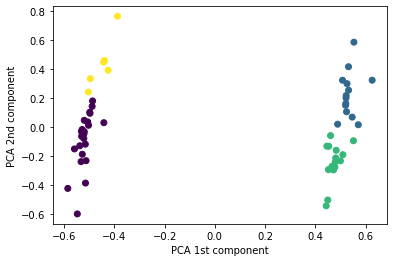

(1, 7)


In [14]:
obs = 30
K = 15
n_clusterss = [4]
data_directory = '../data/mRisk/'
model_name = 'ddhi' #'dres'
data = pickle.load(open('../data/parsed_data/episode_encoded_{}_prediction_60_final.p'.format(obs),'rb'))
data = data[data.stress_seen_so_far==1]
print("No. of unique users", data.user.unique().shape)
data['time_of_day_encoded'] = list(np.array(OneHotEncoder().fit_transform(data['time_of_day'].values.reshape(-1,1)).todense()))
data['time_of_day_encoded'] = data['time_of_day_encoded'].apply(lambda a:list(a))
data['weekday'] = data['static_features'].apply(lambda a:a[0])
data['weekday_encoded'] = list(np.array(OneHotEncoder().fit_transform(data['weekday'].values.reshape(-1,1)).todense()))
data['weekday_encoded'] = data['weekday_encoded'].apply(lambda a:list(a))
data['gender'] = data['static_features'].apply(lambda a:a[1])
gender_clf = OneHotEncoder()
gender_clf.fit(data['gender'].values.reshape(-1,1))
data['gender_encoded'] = list(np.array(gender_clf.transform(data['gender'].values.reshape(-1,1)).todense()))
data['gender_encoded'] = data['gender_encoded'].apply(lambda a:list(a))
if model_name == 'dres':
    data['feature_final'] = data.apply(lambda a:np.array(list(a['feature'])+list(a['daily'])+list(a['stress'])+list(a['activity'])+list(a['smoking_event_features'])+[a['gender_encoded'][0],a['static_features'][-1]]+
                                                        list(a['location_features'])+list(a['time_of_day_encoded'])).reshape(1,-1),axis=1)
else:
    data['feature_final'] = data.apply(lambda a:np.array(list(a['feature'])+list(a['daily'])+
                                                        list(a['location_features'])+list(a['time_of_day_encoded'])).reshape(1,-1),axis=1)
data['static_features'] = data.apply(lambda a:np.array([
                                                        a['static_features'][-1],a['gender_encoded'][0]
                                                    ]).reshape(1,-1),
                                    axis=1)
print(model_name, 'feature shape',data['feature_final'].values[0].shape)
data = standardize(data,['feature_final'])
data['stress_episode'] = data['stress_episode'].apply(lambda a:a.reshape(1,*a.shape))
data['quit_episode'] = data['quit_episode'].apply(lambda a:a.reshape(1,1,*a.shape))
data['activity_episode'] = data['activity_episode'].apply(lambda a:a.reshape(1,*a.shape))
data['smoking_episode'] = data['smoking_episode'].apply(lambda a:a.reshape(1,1,*a.shape))
user_dict_reverse = {user_indices[i]:user_indices[i+1] for i in range(0,len(user_indices)-1,2)}
user_dict = {user_indices[i+1]:user_indices[i] for i in range(0,len(user_indices)-1,2)}

activity_data = pickle.load(open(data_directory+'/activity_episode/activity_episode_data_rice_1st_version_v1.p','rb'))
activity_data['start'] = activity_data['start'].apply(lambda a:fix_timestamp(a))
activity_data['end'] = activity_data['end'].apply(lambda a:fix_timestamp(a))
activity_data['user'] = activity_data['user'].apply(lambda a:user_dict[a] if a in user_dict else a)

stress_episode_data = pickle.load(open(data_directory+'stress_episode/stress_episode_rice_1st_version.p','rb'))
stress_episode_data['start'] = stress_episode_data['start'].apply(lambda a:fix_timestamp(a))
stress_episode_data['end'] = stress_episode_data['end'].apply(lambda a:fix_timestamp(a))
stress_episode_data['user'] = stress_episode_data['user'].apply(lambda a:user_dict[a] if a in user_dict else a)

for n_clusters in n_clusterss:
    df_seq = pd.concat(Parallel(n_jobs=-1,verbose=2)(delayed(get_feature_sequence)(df,K=K) for i,df in data.groupby('user',as_index=False)))
    features = []
    users = []
    for user in df_seq.user.unique():
        features.append(df_seq[df_seq.user==user].static_features.values[0])
        users.append(user)
    phenotype_features = np.concatenate(features)
    features_raw = phenotype_features.copy()
    from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
    phenotype_features = MinMaxScaler().fit_transform(phenotype_features)
    print(phenotype_features.shape)
    X = phenotype_features
    from sklearn.cluster import AgglomerativeClustering
    index = list(np.arange(X.shape[1]))
    xx = []
    yy = []
    
    while len(index)>1:
        x = []
        y = []
        for i in index:
            index_now = [j for j in index if j!=i]
            cluseterer = AgglomerativeClustering(n_clusters=n_clusters).fit(X[:,np.array(index_now)])
            try:
                y.append(silhouette_score(X[:,np.array(index_now)],cluseterer.labels_))
                x.append(i)
            except:
                y.append(0)
                x.append(i)

        i = x[np.argmax(y)]
        # print(i,np.max(y))
        xx.append(str(i))
        yy.append(np.max(y))
        index = [j for j in index if j!=i]
    # plt.figure()
    # plt.plot(xx,yy,'*')
    # plt.show()
    index_of_features_remove = []
    for i,element in enumerate(yy):
        if i>0 and element<yy[i-1]:
            break
        if (i>0 and element-yy[i-1]>.1):
            index_of_features_remove.append(int(xx[i]))
            break
        elif element>.3:
            index_of_features_remove.append(int(xx[i]))
            break
        index_of_features_remove.append(int(xx[i]))
    index_of_features_kept= np.array([i for i in np.arange(X.shape[1]) if i not in index_of_features_remove])
    print(index_of_features_kept)
    cluseterer = AgglomerativeClustering(n_clusters=n_clusters).fit(PCA(n_components=2).fit_transform(phenotype_features[:,index_of_features_kept]))
        # phenotype_features[:,index_of_features_kept])
    y = cluseterer.labels_
    print(Counter(y))
    xx = phenotype_features[y>-1]
    pca = PCA(n_components=2).fit_transform(xx[:,index_of_features_kept])
    plt.figure()
    plt.scatter(pca[:,0],pca[:,1],c=y[y>-1])
    plt.xlabel('PCA 1st component')
    plt.ylabel('PCA 2nd component')
#     plt.colorbar()
    plt.show()
    cluster_dict = {a:y[i] for i,a in enumerate(users)}
    xxx = xx[:,index_of_features_kept]
    features_raw = features_raw[:,index_of_features_kept]
    cluster_features = {a:list(xxx[y==y[i],:].mean(axis=0)) for i,a in enumerate(users)}
    df_seq['cluster_label'] = df_seq['user'].apply(lambda a:cluster_dict[a])
    df_seq['static_features'] = df_seq.apply(lambda a:
                                            np.array(list(cluster_features[a['user']])).reshape(1,-1),
                                            axis=1)
    print(df_seq.static_features.iloc[0].shape)
    feature_names = ['visit_freq',
                'visit_duration_mean',
                'stress_avg_density_per_day',
                'stress_avg_duration_per_day',
                'stress_count_per_day',
                'activity_avg_duration_per_day',
                'activity_count_per_day',
                'age',
                'Gender']
    feature_names_final = [[feature_names[i] for i in index_of_features_kept]]*df_seq.shape[0]
    df_seq['feature_names'] = feature_names_final
    if model_name=='dres':
        pickle.dump(df_seq,open('../data/episode_encoded_lagged_data_without_episode/episode_encoded_'+'lagged_'+str(K)+'_obs_{}'.format(obs)+'_windows_cluster_{}'.format(n_clusters),'wb'))
    else:
        pickle.dump(df_seq,open('../data/episode_encoded_lagged_data_with_episode/episode_encoded_'+'lagged_'+str(K)+'_obs_{}'.format(obs)+'_windows_cluster_{}'.format(n_clusters),'wb'))

In [8]:
# df_seq.groupby('user').count().sort_values('feature_final')
data.user.unique().shape

(59,)

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update({'font.size':15})
plt.figure()
plt.scatter(pca[:,0],pca[:,1],c=y[y>-1])
plt.xlabel('PCA Component \n1st')
plt.ylabel('PCA Component \n2nd')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# plt.xticks([],[])
# plt.yticks([],[])
#     plt.colorbar()
plt.tight_layout()
plt.savefig('./data/images/cluster_pic_2_clusters.png')
plt.show()

In [ ]:
# xxx.shape,len(index_of_features_kept),

df = pd.DataFrame(features_raw,columns=[feature_names[i] for i in index_of_features_kept])
# df_seq.user.unique().shape
#
df['label'] = y


# df.groupby('label').apply()

df_seq.user.unique().shape

df

In [ ]:
df_seq.head()

In [ ]:


# change = {3:3,2:1,1:2,0:0}
# df['label'] = df['label'].apply(lambda a:change[a])
df_seq[['label','user']].groupby(['user']).sum().values.reshape(-1)
import matplotlib.pyplot as plt
import seaborn as sns
f_names = [feature_names[i] for i in index_of_features_kept]
for f in f_names:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='label',y=f,data=df,showfliers=False)
    plt.title(f.capitalize())
    plt.xlabel('Cluster')
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:

from sklearn.metrics import pairwise_distances
# xxx = StandardScaler().fit_transform(xxx)

In [ ]:
data = []
for c in np.arange(4):
    r = pairwise_distances(xxx[y==c]).reshape(-1)
    data.append(r[r>0])

In [ ]:
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(10,5))
plt.boxplot(data)
plt.ylabel('Pairwise Distance of \ndatapoints within each cluster')
plt.xticks(np.arange(1,5),['Cluster '+str(a) for a in np.arange(4)])
plt.tight_layout()
plt.savefig('./data/images/subtype_pairwise.png')
plt.show()

# data/

In [ ]:
# 
import shap
clf = RandomForestClassifier()
clf.fit(xxx,y)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(xxx)

In [ ]:
len(shap_values)

In [ ]:
shap.summary_plot(shap_values, xxx, plot_type="bar", class_names= ['Cluster - '+str(a) for a in range(4)], 
                  feature_names = [feature_names[i] for i in index_of_features_kept])

In [ ]:
# from catboost import CatBoostClassifier
plt.rcParams.update({'font.size':20})
plt.figure(figsize=(20,10))
plt.bar(f_names,clf.feature_importances_)
plt.xticks(rotation=60)
plt.ylabel('Random Forest Feature Importance')
plt.show()

In [ ]:
df.groupby('label').mean()

In [ ]:
model.fit(xxx,y)

In [ ]:
import catboost
abc = model.get_feature_importance(type=catboost.EFstrType.ShapInteractionValues, prettified=True, thread_count=-1, verbose=False)

In [ ]:
abc

In [ ]:
for label in np.unique(y):
    clf = RandomForestClassifier()
    y1 = np.array([0]*y.shape[0])
    y1[y==label] = 1
    clf.fit(xxx,y1)
    plt.figure(figsize=(20,10))
    plt.bar([feature_names[i] for i in index_of_features_kept],clf.feature_importances_)
    plt.title(label)
    plt.show()


In [ ]:
[feature_names[i] for i in index_of_features_kept],index_of_features_kept

In [ ]:
features = []
for user in df_seq.user.unique():
#     print(df_seq[df_seq.user==user].static_features.values[10])
    features.append(df_seq[df_seq.user==user].static_features.values[0])
#     np.concatenate(df_seq.static_features.values)
phenotype_features = np.concatenate(features)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import OPTICS,DBSCAN,KMeans
from sklearn.metrics import silhouette_score

In [ ]:
X = phenotype_features
index = list(np.arange(X.shape[1]))
xx = []
yy = []
while len(index)>1:
    x = []
    y = []
    for i in index:
        index_now = [j for j in index if j!=i]
    #     x_pca = PCA(n_components=2).fit_transform(X[:,np.array(index_now)])
        cluseterer = OPTICS(min_samples=3).fit(X[:,np.array(index_now)])
#         cluseterer = KMeans(n_clusters=5).fit(X[:,np.array(index_now)])
        try:
            y.append(silhouette_score(X[:,np.array(index_now)],cluseterer.labels_))
            x.append(i)
        except:
            y.append(0)
            x.append(i)
        
    i = x[np.argmax(y)]
    print(i,np.max(y))
    xx.append(str(i))
    yy.append(np.max(y))
    index = [j for j in index if j!=i]
#     plt.figure(figsize=(20,10))
#     plt.scatter(x_pca[:,0],x_pca[:,1])
#     plt.show()
plt.figure()
plt.plot(xx,yy,'*')
plt.show()
index_of_features_remove = []
for i,element in enumerate(yy):
    if i>0 and element<yy[i-1]:
        break
    if (i>0 and element-yy[i-1]>.1):
        index_of_features_remove.append(int(xx[i]))
        break
    elif element>.3:
        index_of_features_remove.append(int(xx[i]))
        break
    index_of_features_remove.append(int(xx[i]))
index_of_features_kept= np.array([i for i in np.arange(X.shape[1]) if i not in index_of_features_remove])
print(index_of_features_kept)
# cluseterer = OPTICS(min_samples=4).fit(phenotype_features[:,index_of_features_kept])
cluseterer = AgglomerativeClustering(n_clusters=5).fit(phenotype_features[:,index_of_features_kept])
y = cluseterer.labels_
xx = phenotype_features[y>-1]
pca = TSNE(n_components=2,perplexity=5).fit_transform(xx[:,index_of_features_kept])
plt.scatter(pca[:,0],pca[:,1],c=y[y>-1])
plt.colorbar()
plt.show()
Counter(cluseterer.labels_)

In [ ]:
pickle.dump(df,open('./data/saved_result/cluster.p','wb'))


In [ ]:
# data = pickle.load(open('./data/episode_encoded_lagged_data/episode_encoded_lagged_10_windows_standardized.p','rb'))
# data = pickle.load(open('./data/parsed_data/episode_encoded_30_prediction_60_new.p','rb'))

In [ ]:
# data.columns

In [ ]:
stress_episode_data.head()

In [ ]:
%config Completer.use_jedi = False